**深度学习**称作端到端的学习, End-To-End Machine Leaning, **从原始数据中获得目标结果**

## 均方误差

In [129]:
# mean squared error
import numpy as np
def mean_square_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

t = [0,   0,    1,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(mean_square_error(np.array(y), np.array(t)))


t = [1,   0,    0,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(mean_square_error(np.array(y), np.array(t)))

0.10250000000000002
0.6024999999999999


## 交叉熵误差

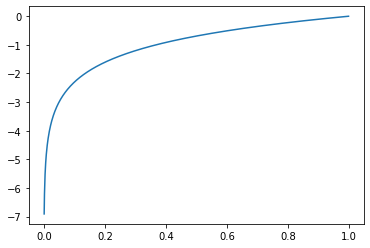

In [130]:
# cross entropy error
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.001, 1, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.show()

In [131]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
t = [0,   0,    1,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(cross_entropy_error(np.array(y), np.array(t)))


t = [1,   0,    0,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


## mini batch

In [132]:
import sys, os
sys.path.append('SourceCode')
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [133]:
train_size = x_train.shape[0]
batch_size = 10
print('train_size:%d, batch_size:%d' % (train_size, batch_size))

train_size:60000, batch_size:10


In [134]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[59043 50080  8903 33315 47222  4469 39263 20363 26004  6002]


In [135]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch.shape, '\n',  t_batch.shape)

(10, 784) 
 (10, 10)


In [136]:
# mini-batch 交叉熵误差
# one hot数据
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
cross_entropy_error(t_batch, t_batch)

-9.999999505838706e-08

In [137]:
# 非one hot数据
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
batch_size = 10
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)
print(np.arange(batch_size))

[0 1 2 3 4 5 6 7 8 9]


In [138]:
t_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [139]:
t_train[np.arange(batch_size)]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# 数值微分

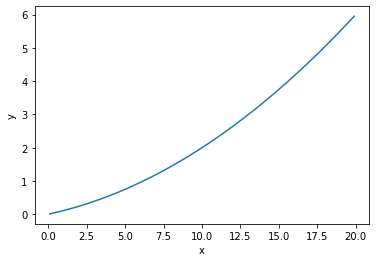

In [140]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)


# derivate is 0.02x
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.1, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [141]:
numerical_diff(function_1, 5)

0.1999999999990898

In [142]:
numerical_diff(function_1, 10)

0.2999999999986347

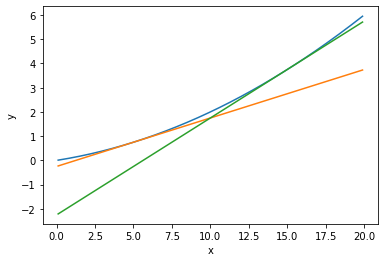

In [143]:
def tangent_line(f, x):
    d = numerical_diff(f, x)    
    y = f(x) - d * x    
    return lambda t: d*t + y
tf = tangent_line(function_1, 5)
y1 = tf(x)
tf2 = tangent_line(function_1, 15)
y2 = tf2(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [144]:
# 偏导数
def function_2(x):
    return np.sum(x ** 2)
x = np.array([1, 2])
function_2(x)

5

No handles with labels found to put in legend.


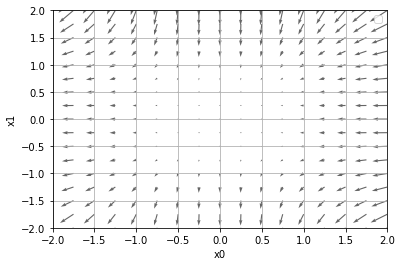

In [145]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**3 + 10)
    else:
        return np.sum(x**3 + 10, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

In [146]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]                
        grad[idx] = (f(tmp_val + h) - f(tmp_val - h)) / (2*h)            
    return grad

def function2(x):
    return np.sum(x ** 2)

numerical_gradient(function2, np.array([3.0 ,4.0]))

def gradient_decent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x);
        x -= lr * grad
    return x

#使用梯度法求f(x0, x1) = x0 ** 2 + x1 ** 2最小值
def function_2(x):
    return np.sum((x - 10) ** 2 + x + 10)

init_x = np.array([-3.0, 4.0])
gradient_decent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([9.5, 9.5])

## 图示梯度法

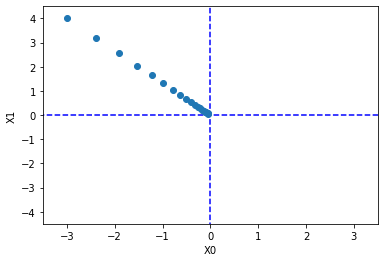

In [147]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt



def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## 神经网络的梯度

In [156]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录中的文件而进行的设定
import numpy as np

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    for idx in range(x.size):
        
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        
        
        grad[idx] = (fxh1 - fxh2) / (2*h)        
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

class simpleNet:
    def __init__(self):
        #self.W = np.random.randn(2,3)
        self.W = np.array([[0.1, 0.2, 0.3],
                        [0.4, 0.5, 0.6]])

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):    
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.17085771  0.19850834 -0.36936605]
 [ 0.25628657  0.29776251 -0.55404908]]


In [154]:
predict_value = np.dot(x, net.W)
predict_value

array([0.42, 0.57, 0.72])

In [150]:
softmax_value = np.exp(predict_value)/np.sum(np.exp(pred))
softmax_value

array([0.28476293, 0.33084732, 0.38438975])

In [151]:
loss_value = -np.sum(t * np.log(softmax_value))
loss_value

0.9560982716982017

In [160]:
#自己分解算法

grad_value = np.zeros_like(net.W)
f = lambda w: net.loss(x, t)
for idx, w in enumerate(net.W): # 针对权重每一行
    h = 1e-4
    g = np.zeros_like(w)
    for j in range(w.size): # 针对权重每一列, 计算某个单一权重值的梯度
        temp = w[j]
        
        # 此处修改了net对象的w值, 用来计算f(x)的值
        w[j] = temp + h
        val_plus = f(x) #w+h的情况下计算f(x)
        
        w[j] = temp - h
        val_minus = f(x) #w-h的情况下计算f(x)
        
        w[j] = temp
        
        g[j] = (val_plus - val_minus) / (2 * h) #计算梯度
        
    grad_value[idx] = g
grad_value

array([[ 0.17085038,  0.19851173, -0.36936211],
       [ 0.25627557,  0.2977676 , -0.55404317]])

# 学习算法的实现

**SGD** Stochastic Gradient Descent

In [210]:
# coding: utf-8
import sys, os

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    for idx in range(x.size):
        
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        
        
        grad[idx] = (fxh1 - fxh2) / (2*h)        
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
#net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
#print('W1.shape:', net.params['W1'].shape)
#print('b1.shape:', net.params['b1'].shape)
#print('W2.shape:', net.params['W2'].shape)
#print('b2.shape:', net.params['b2'].shape)

#  假的测绘数据
#x = np.random.rand(10, 784)
#t = np.random.rand(10, 10)
#y = net.predict(x) 
#print('x.shape:%s, t.shape:%s, y.shape:%s' % (x.shape, t. shape, y.shape))
# grads = net.numerical_gradient(x, t) #  非常慢
#grads = net.gradient(x, t)
#print('grads[W1]:', grads['W1'].shape)
#print('grads[b1]:', grads['b1'].shape)
#print('grads[W2]:', grads['W2'].shape)
#print('grads[b2]:', grads['b2'].shape)

# 神经网络训练

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.78915, 0.7933
train acc, test acc | 0.8756166666666667, 0.8795
train acc, test acc | 0.8966166666666666, 0.9007
train acc, test acc | 0.9067333333333333, 0.9108
train acc, test acc | 0.9147333333333333, 0.9156
train acc, test acc | 0.9200833333333334, 0.9232
train acc, test acc | 0.92355, 0.9264
train acc, test acc | 0.9280166666666667, 0.9294
train acc, test acc | 0.9301166666666667, 0.9324
train acc, test acc | 0.9340333333333334, 0.9357
train acc, test acc | 0.9363833333333333, 0.9378
train acc, test acc | 0.9389666666666666, 0.9381
train acc, test acc | 0.94105, 0.9407
train acc, test acc | 0.9433833333333334, 0.9429
train acc, test acc | 0.9451666666666667, 0.9448
train acc, test acc | 0.9471166666666667, 0.9443


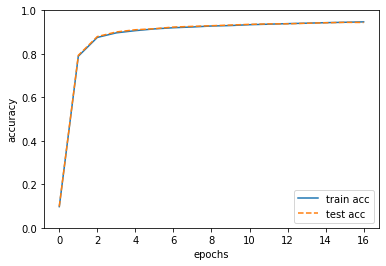

In [211]:
import sys, os
sys.path.append('SourceCode')  # 为了导入父目录的文件而进行的设定
sys.path.append('SourceCode/ch04')
sys.path.append('SourceCode/common')
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()